# KenyaCoV: With and without the Zhang susceptibility estimates



In [6]:
push!(LOAD_PATH, "/Users/Sam/GitHub/KenyaCoV/src")
push!(LOAD_PATH, "/Users/Sam/GitHub/KenyaCoV/data")

using DifferentialEquations, Plots,CSV
using LinearAlgebra
import KenyaCoV

In [7]:
# Load data for model --- and create an initially susceptible population
u0,P,transport_matrix = KenyaCoV.model_ingredients_from_data("./../data/data_for_age_structuredmodel_with_counties.jld2",
                                                             "./../data/flight_numbers.csv",
                                                             "./../data/projected_global_prevelance.csv");
# #Change some parameters away from default

for (i,p) in enumerate(P.global_prev)
    P.global_prev[i] = 0.
end
P.ϵ = 1.
P.χ = ones(17)

counties = CSV.read("./../data/2019_census_age_pyramids_counties.csv")
Nairobi_index = findfirst(counties.county .== "Nairobi")
Mombassa_index = findfirst(counties.county .== "Mombasa")
Kwale_index = findfirst(counties.county .== "Kwale")
Kilifi_index = findfirst(counties.county .== "Kilifi")
Mandera_index  = findfirst(counties.county .== "Mandera")

#Rescale by maximum eigenvalue of the age mixing matrix rescaled by susceptibility

sus_matrix = repeat(P.χ,1,17)
R_A = P.ϵ*((1/P.σ₂) + (1/P.γ) )
R_M = (P.ϵ/P.σ₂) + (P.ϵ_D/P.γ)
R_V = (P.ϵ/P.σ₂) + (P.ϵ_V/P.τ)
R_vector = [(1-P.rel_detection_rate[a])*R_A + P.rel_detection_rate[a]*(1-P.hₐ[a])*R_M + P.rel_detection_rate[a]*P.hₐ[a]*R_V for a = 1:17]
inf_matrix = repeat(R_vector',17,1)

eigs, = eigen(sus_matrix.*P.M.*inf_matrix)
max_eigval = Real(eigs[end])


P.β = 2.5/max_eigval# Choosing the transmission rate that matches R₀ = 2.5
P.dt = 0.25; #<---- KenyaCoV is a discrete time simulation, timestep here is 1/10th of a day

u0[Nairobi_index,8,3] = 500 #10 initial pre-symptomatics in Nairobi
u0[Mombassa_index,8,3] = 300 #10 initial pre-symptomatics in Mombasa
u0[Mandera_index,8,3] = 200 #5 initial pre-symptomatics in Mandera

200

In [8]:
#Solve two different models

prob_ode = KenyaCoV.create_KenyaCoV_ode_prob(u0,(0.,365.),P)
sol_ode = solve(prob_ode,Tsit5());

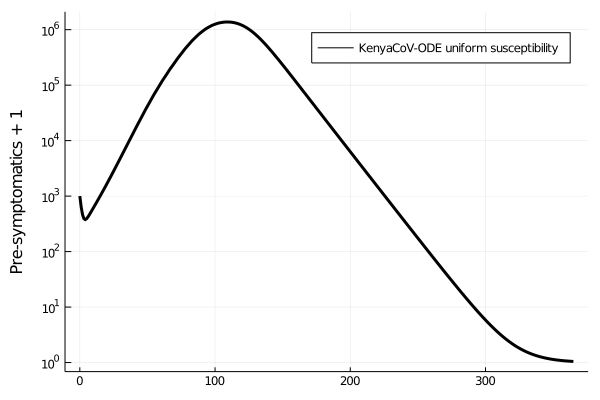

In [17]:
# PreS = [sum(u[:,:,3]) for u in sol.u ]
PreS_ode = [sum(sol_ode(t)[:,:,3]) for t in 0.:1.:sol_ode.t[end]] 

# plt = plot(sol.t,PreS .+ 1,lw = 3, lab = "KenyaCoV-stochastic, dt = $(P.dt)", xlims = (0.,240.), xlabel = "time (days)", 
#                     ylabel = "Pre-symptomatics + 1",
#                     yscale = :log10)
plt = plot(0.:1.:sol_ode.t[end],PreS_ode .+ 1,lw = 3,color = :black, lab = "KenyaCoV-ODE uniform susceptibility",
                ylabel = "Pre-symptomatics + 1",
                yscale = :log10)

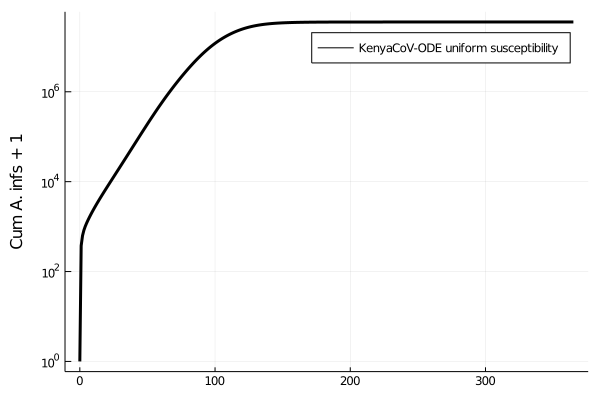

In [38]:

cum_PA_ode = [sum(sol_ode(t)[:,:,9]) for t in  0.:1.:sol_ode.t[end]] 

plt_A = plot(0.:1.:sol_ode.t[end],cum_PA_ode .+ 1,lw = 3,color = :black, lab = "KenyaCoV-ODE uniform susceptibility",
                ylabel = "Cum A. infs + 1",
                yscale = :log10)

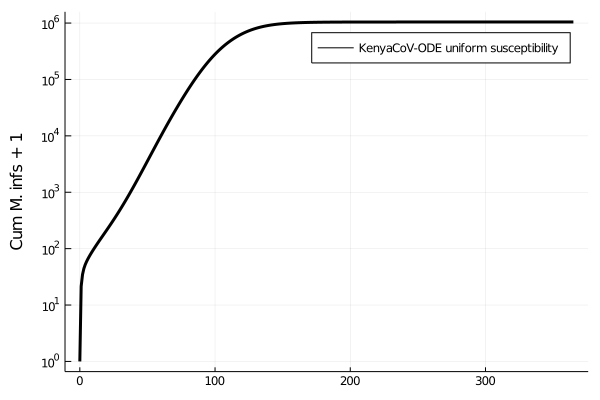

In [20]:

cum_PM_ode = [sum(sol_ode(t)[:,:,10]) for t in 0.:1.:sol_ode.t[end]] 

plt_M = plot(0.:1.:sol_ode.t[end],cum_PM_ode .+ 1,lw = 3,color = :black, lab = "KenyaCoV-ODE uniform susceptibility",
                ylabel = "Cum M. infs + 1",
                yscale = :log10)

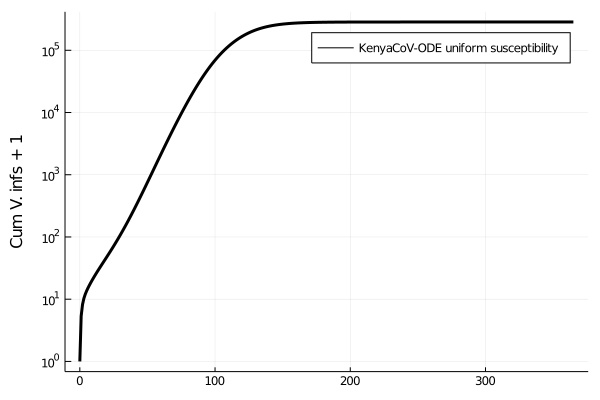

In [33]:
cum_PV_ode = [sum(sol_ode(t)[:,:,11]) for t in 0.:1.:sol_ode.t[end]] 

plt_V = plot(0.:1.:sol_ode.t[end],cum_PV_ode .+ 1,lw = 3,color = :black, lab = "KenyaCoV-ODE uniform susceptibility",
                ylabel = "Cum V. infs + 1",
                yscale = :log10)

In [30]:
u0,P,transport_matrix = KenyaCoV.model_ingredients_from_data("./../data/data_for_age_structuredmodel_with_counties.jld2",
                                                             "./../data/flight_numbers.csv",
                                                             "./../data/projected_global_prevelance.csv");
# #Change some parameters away from default

for (i,p) in enumerate(P.global_prev)
    P.global_prev[i] = 0.
end
P.ϵ = 1.
χ_zhang = vcat(0.34*ones(3),ones(10),1.47*ones(4))
P.χ = χ_zhang

counties = CSV.read("./../data/2019_census_age_pyramids_counties.csv")
Nairobi_index = findfirst(counties.county .== "Nairobi")
Mombassa_index = findfirst(counties.county .== "Mombasa")
Kwale_index = findfirst(counties.county .== "Kwale")
Kilifi_index = findfirst(counties.county .== "Kilifi")
Mandera_index  = findfirst(counties.county .== "Mandera")

#Rescale by maximum eigenvalue of the age mixing matrix rescaled by susceptibility

sus_matrix = repeat(χ_zhang,1,17)
R_A = P.ϵ*((1/P.σ₂) + (1/P.γ) )
R_M = (P.ϵ/P.σ₂) + (P.ϵ_D/P.γ)
R_V = (P.ϵ/P.σ₂) + (P.ϵ_V/P.τ)
R_vector = [(1-P.rel_detection_rate[a])*R_A + P.rel_detection_rate[a]*(1-P.hₐ[a])*R_M + P.rel_detection_rate[a]*P.hₐ[a]*R_V for a = 1:17]
inf_matrix = repeat(R_vector',17,1)

eigs, = eigen(sus_matrix.*P.M.*inf_matrix)
max_eigval = Real(eigs[end])


P.β = 2.5/max_eigval# Choosing the transmission rate that matches R₀ = 2.5
P.dt = 0.25; #<---- KenyaCoV is a discrete time simulation, timestep here is 1/10th of a day

u0[Nairobi_index,8,3] = 500 #10 initial pre-symptomatics in Nairobi
u0[Mombassa_index,8,3] = 300 #10 initial pre-symptomatics in Mombasa
u0[Mandera_index,8,3] = 200 #5 initial pre-symptomatics in Mandera

200

In [34]:
prob_ode_zhang = KenyaCoV.create_KenyaCoV_ode_prob(u0,(0.,365.),P)
sol_ode_zhang = solve(prob_ode_zhang,Tsit5());

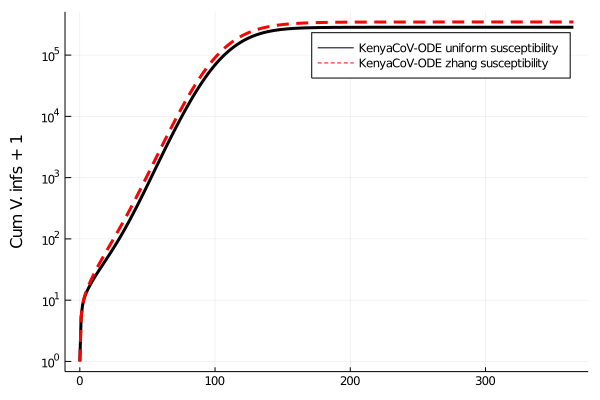

In [35]:
cum_PV_ode_zhang = [sum(sol_ode_zhang(t)[:,:,11]) for t in 0.:1.:sol_ode_zhang.t[end]] 

plot!(plt_V,0.:1.:sol_ode.t[end],cum_PV_ode_zhang .+ 1,lw = 3,color = :red, ls = :dash,
                lab = "KenyaCoV-ODE zhang susceptibility",
                ylabel = "Cum V. infs + 1",
                yscale = :log10)

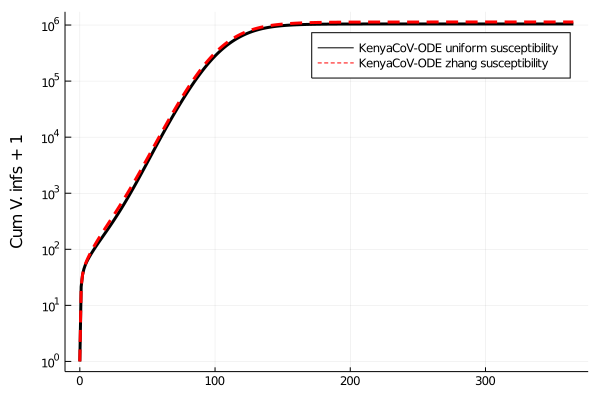

In [36]:
cum_PM_ode_zhang = [sum(sol_ode_zhang(t)[:,:,10]) for t in 0.:1.:sol_ode_zhang.t[end]] 

plot!(plt_M,0.:1.:sol_ode.t[end],cum_PM_ode_zhang .+ 1,lw = 3,color = :red, ls = :dash,
                lab = "KenyaCoV-ODE zhang susceptibility",
                ylabel = "Cum V. infs + 1",
                yscale = :log10)

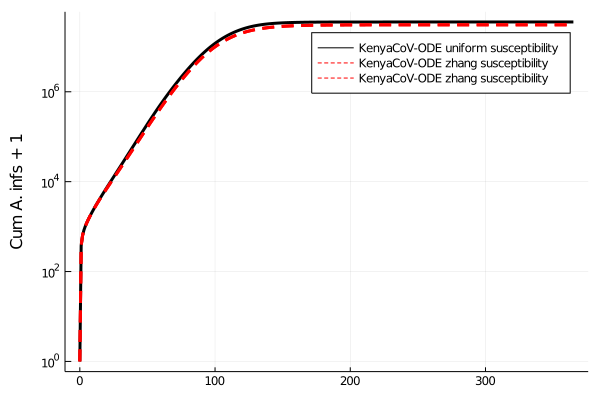

In [40]:
cum_PA_ode_zhang = [sum(sol_ode_zhang(t)[:,:,9]) for t in 0.:1.:sol_ode_zhang.t[end]] 

plot!(plt_A,0.:1.:sol_ode.t[end],cum_PA_ode_zhang .+ 1,lw = 3,color = :red, ls = :dash,
                lab = "KenyaCoV-ODE zhang susceptibility",
                ylabel = "Cum A. infs + 1",
                yscale = :log10)